In [92]:
import numpy as np
import skfuzzy as fuzz
from matplotlib import pyplot as plt
import pandas as pd

In [93]:
kluster0 = pd.read_csv('data/kluster0.csv')
kluster1 = pd.read_csv('data/kluster1.csv')
kluster2 = pd.read_csv('data/kluster2.csv')

In [94]:
df = pd.concat([kluster0,kluster1,kluster2],axis=0)

In [95]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,94,Female,40,60,40,0
1,113,Female,38,64,42,0
2,121,Male,27,67,56,0
3,122,Female,38,67,40,0
4,123,Female,40,69,58,0


In [96]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,0.930000
std,57.879185,13.969007,26.264721,25.823522,0.829785
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,49.000000,78.000000,73.000000,2.000000
max,200.000000,70.000000,137.000000,99.000000,2.000000


In [97]:
x_age = np.arange(0, 100, 1)
x_income = np.arange(0, 200, 1)
x_spending = np.arange(0, 100, 1)

In [98]:
age_muda = fuzz.trimf(x_age, [0, 0, 35])
age_dewasa = fuzz.trimf(x_age, [25, 40, 60])
age_tua = fuzz.trimf(x_age, [50, 100, 100])
income_miskin = fuzz.trimf(x_income, [0, 0, 50])
income_menengah = fuzz.trimf(x_income, [30, 100, 150])
income_kaya = fuzz.trimf(x_income, [100, 200, 200])
spending_rendah = fuzz.trimf(x_spending, [0, 0, 40])
spending_sedang = fuzz.trimf(x_spending, [30, 50, 70])
spending_tinggi = fuzz.trimf(x_spending, [60, 100, 100])


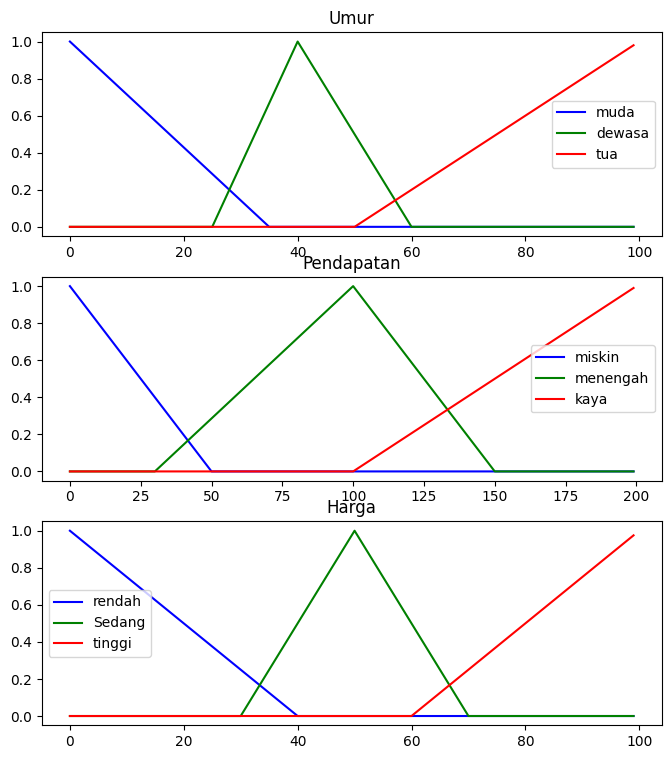

In [99]:
fig,(ax0,ax1,ax2) = plt.subplots(nrows=3,figsize=(8,9))

ax0.plot(x_age,age_muda, 'b',linewidth=1.5,label = 'muda')
ax0.plot(x_age,age_dewasa, 'g',linewidth=1.5,label = 'dewasa')
ax0.plot(x_age,age_tua, 'r',linewidth=1.5,label = 'tua')
ax0.set_title('Umur')
ax0.legend()


ax1.plot(x_income,income_miskin, 'b',linewidth=1.5,label = 'miskin')
ax1.plot(x_income,income_menengah, 'g',linewidth=1.5,label = 'menengah')
ax1.plot(x_income,income_kaya, 'r',linewidth=1.5,label = 'kaya')
ax1.set_title('Pendapatan')
ax1.legend()

ax2.plot(x_spending,spending_rendah, 'b',linewidth=1.5,label = 'rendah')
ax2.plot(x_spending,spending_sedang, 'g',linewidth=1.5,label = 'Sedang')
ax2.plot(x_spending,spending_tinggi, 'r',linewidth=1.5,label = 'tinggi')
ax2.set_title('Harga')
ax2.legend()


### Mamdani

1. “Jika usia muda dan pendapatan kaya maka pengeluaran tinggi.”
2. Jika usia muda dan pendapatan menengah maka pengeluaran sedang
3. Jika usia muda dan pendapatan miskin maka pengeluaran sedang
4. Jika usia dewasa dan pendapatan kaya maka pengeluaran tinggi
5. Jika usia dewasa dan pendapatan menengah maka pengeluaran sedang
6. Jika usia dewasa dan pendapatan miskin maka pengeluaran rendah
7. Jika usia tua dan pendapatan kaya maka pengeluaran sedang
8. Jika usia tua dan pendapatan sedang maka pengeluaran rendah
9. Jika usia tua dan pendapatan rendah maka pengeluaran rendah


In [100]:
def fire_and_plot(rule_no, alpha, konsekuen, title, ax):
    activation = np.fmin(alpha, konsekuen)
    ax.fill_between(x_spending, np.zeros_like(x_spending), activation, facecolor="orange", alpha=0.7)
    ax.plot(x_spending, konsekuen, 'k--', alpha=0.5)
    ax.set_title(f"Rule {rule_no}: {title}")
    ax.set_ylim(0,1.1)

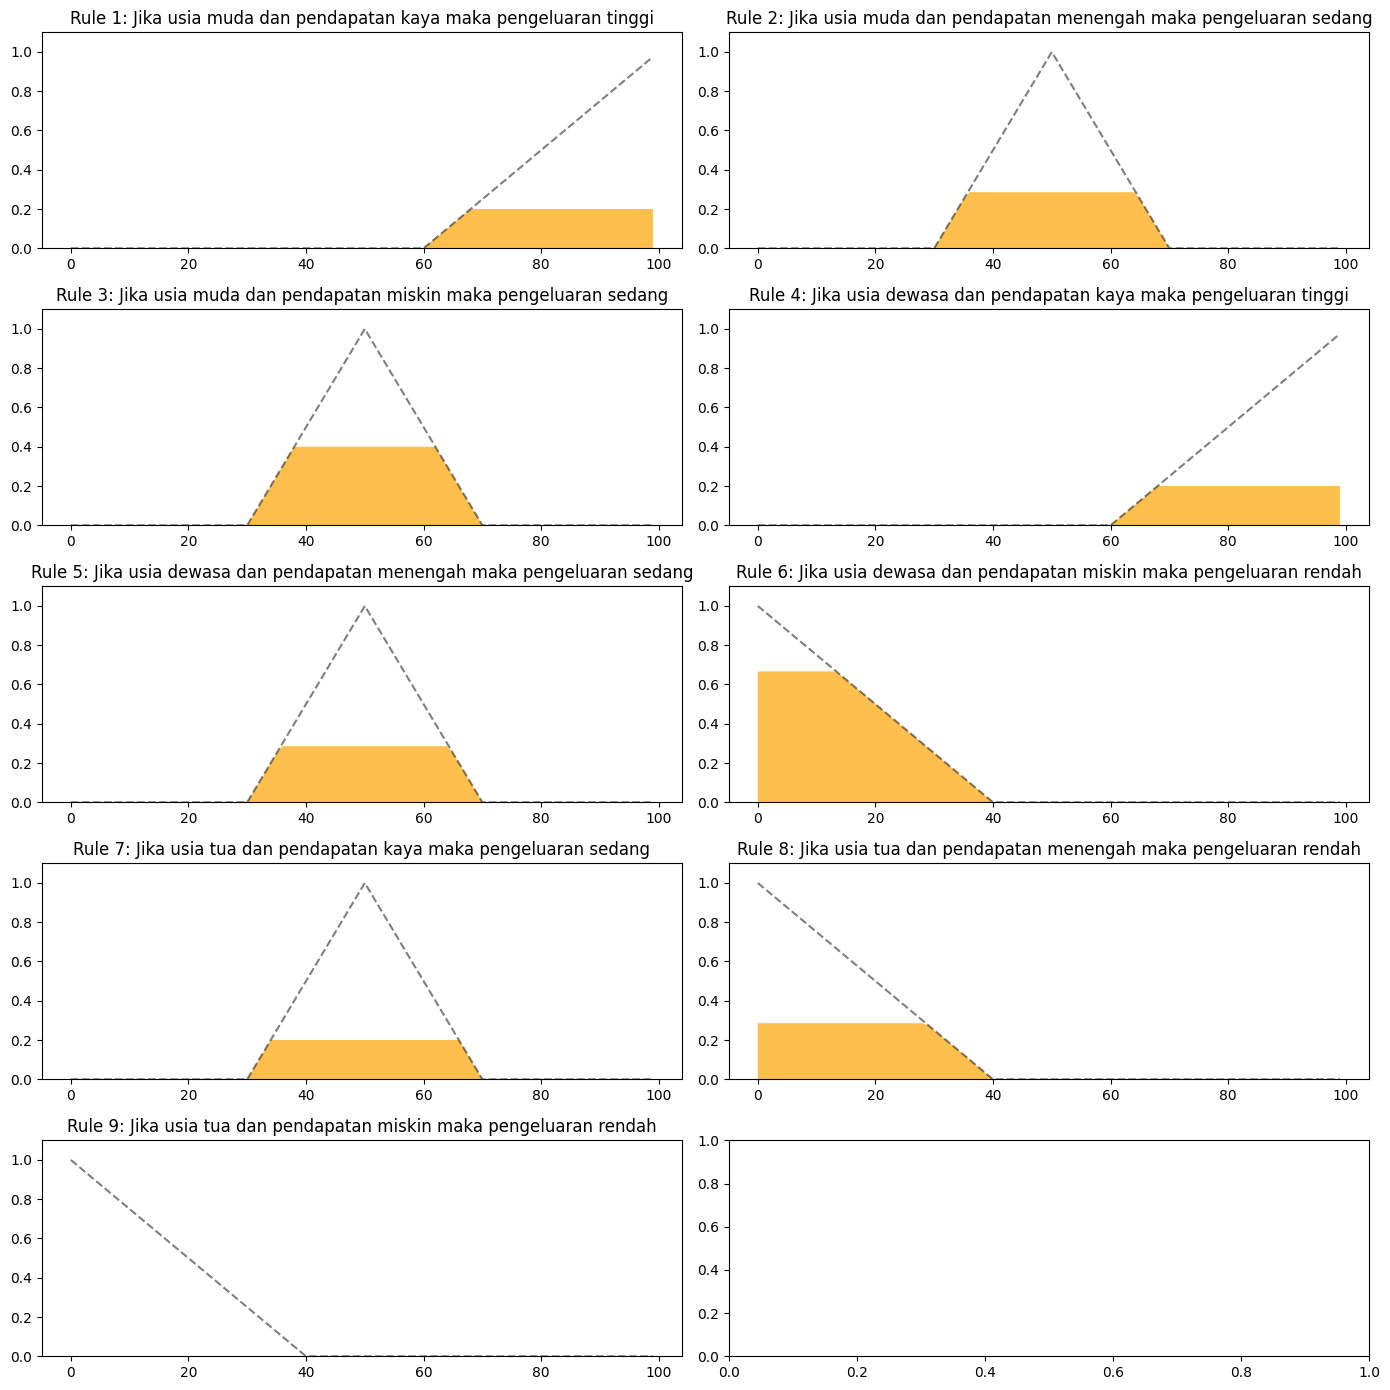

In [101]:
def plot_all_rules():
    fig, axes = plt.subplots(5, 2, figsize=(14,14))
    axes = axes.flatten()

    alpha1 = np.fmin(age_muda[21],income_kaya[120])
    fire_and_plot(1,alpha1,spending_tinggi,'Jika usia muda dan pendapatan kaya maka pengeluaran tinggi',axes[0])

    alpha2 = np.fmin(age_muda[21],income_menengah[50])
    fire_and_plot(2,alpha2,spending_sedang,'Jika usia muda dan pendapatan menengah maka pengeluaran sedang',axes[1])

    alpha3 = np.fmin(age_muda[21],income_miskin[10])
    fire_and_plot(3,alpha3,spending_sedang,'Jika usia muda dan pendapatan miskin maka pengeluaran sedang',axes[2])

    alpha4 = np.fmin(age_dewasa[35],income_kaya[120])
    fire_and_plot(4,alpha4,spending_tinggi,'Jika usia dewasa dan pendapatan kaya maka pengeluaran tinggi',axes[3])

    alpha5 = np.fmin(age_dewasa[35],income_menengah[50])
    fire_and_plot(5,alpha5,spending_sedang,'Jika usia dewasa dan pendapatan menengah maka pengeluaran sedang',axes[4])

    alpha6 = np.fmin(age_dewasa[35],income_miskin[10])
    fire_and_plot(6,alpha6,spending_rendah,'Jika usia dewasa dan pendapatan miskin maka pengeluaran rendah',axes[5])

    alpha7 = np.fmin(age_tua[65],income_kaya[120])
    fire_and_plot(7,alpha7,spending_sedang,'Jika usia tua dan pendapatan kaya maka pengeluaran sedang',axes[6])

    alpha8 = np.fmin(age_tua[65],income_menengah[50])
    fire_and_plot(8,alpha8,spending_rendah,'Jika usia tua dan pendapatan menengah maka pengeluaran rendah',axes[7])

    alpha9 = np.fmin(age_tua[65],income_miskin[50])
    fire_and_plot(9,alpha9,spending_rendah,'Jika usia tua dan pendapatan miskin maka pengeluaran rendah',axes[8])

    plt.tight_layout()
    plt.show()

plot_all_rules()

In [102]:
def mamdami(age, income):
    
    age_level_muda = fuzz.interp_membership(x_age, age_muda, age)
    age_level_dewasa = fuzz.interp_membership(x_age, age_dewasa, age)
    age_level_tua = fuzz.interp_membership(x_age, age_tua, age)

    income_level_miskin = fuzz.interp_membership(x_income, income_miskin, income)
    income_level_menengah = fuzz.interp_membership(x_income, income_menengah, income)
    income_level_kaya = fuzz.interp_membership(x_income, income_kaya, income)

   
    alpha1 = np.fmin(age_level_muda, income_level_kaya)
    alpha2 = np.fmin(age_level_muda, income_level_menengah)
    alpha3 = np.fmin(age_level_muda, income_level_miskin)
    alpha4 = np.fmin(age_level_dewasa, income_level_kaya)
    alpha5 = np.fmin(age_level_dewasa, income_level_menengah)
    alpha6 = np.fmin(age_level_dewasa, income_level_miskin)
    alpha7 = np.fmin(age_level_tua, income_level_kaya)
    alpha8 = np.fmin(age_level_tua, income_level_menengah)
    alpha9 = np.fmin(age_level_tua, income_level_miskin)
    
    
    tinggi1 = np.fmin(alpha1, spending_tinggi)
    tinggi4 = np.fmin(alpha4, spending_tinggi)
    activation_tinggi = np.fmax(tinggi1, tinggi4)

    sedang2 = np.fmin(alpha2, spending_sedang)
    sedang5 = np.fmin(alpha5, spending_sedang)
    sedang7 = np.fmin(alpha7, spending_sedang)
    sedang3 = np.fmin(alpha3, spending_sedang)
    activation_sedang = np.fmax.reduce([sedang2, sedang3, sedang5, sedang7])

    rendah6 = np.fmin(alpha6, spending_rendah)
    rendah8 = np.fmin(alpha8, spending_rendah)
    rendah9 = np.fmin(alpha9, spending_rendah)
    activation_rendah = np.fmax.reduce([rendah6, rendah8, rendah9])

    
    agregate = np.fmax.reduce([activation_tinggi, activation_sedang, activation_rendah])

    
    pengeluaran = fuzz.defuzz(x_spending, agregate, 'centroid')
    pengeluaran_activation = fuzz.interp_membership(x_spending, agregate, pengeluaran)

    
    rendah_val = fuzz.interp_membership(x_spending, spending_rendah, pengeluaran)
    sedang_val = fuzz.interp_membership(x_spending, spending_sedang, pengeluaran)
    tinggi_val = fuzz.interp_membership(x_spending, spending_tinggi, pengeluaran)

    labels = {"Rendah": rendah_val, "Sedang": sedang_val, "Tinggi": tinggi_val}
    label_dominan = max(labels, key=labels.get)

    
    plt.figure(figsize=(7, 4))
    plt.plot(x_spending, spending_rendah, 'b', linestyle='--', alpha=0.5)
    plt.plot(x_spending, spending_sedang, 'g', linestyle='--', alpha=0.5)
    plt.plot(x_spending, spending_tinggi, 'r', linestyle='--', alpha=0.5)
    plt.fill_between(x_spending, np.zeros_like(x_spending), agregate, facecolor='orange', alpha=0.7)
    plt.plot([pengeluaran, pengeluaran], [0, pengeluaran_activation], 'k', linewidth=2)
    plt.title(f'Output pengeluaran pelanggan (Mamdani)\nCrisp={pengeluaran:.2f}%, Label={label_dominan}')
    plt.xlabel('Pengeluaran (%)')
    plt.ylabel('Derajat keanggotaan')
    plt.text(pengeluaran, pengeluaran_activation + 0.05, f'{pengeluaran:.2f}% ({label_dominan})',
             ha='center', fontsize=10, fontweight='bold')
    plt.show()

    return pengeluaran, label_dominan


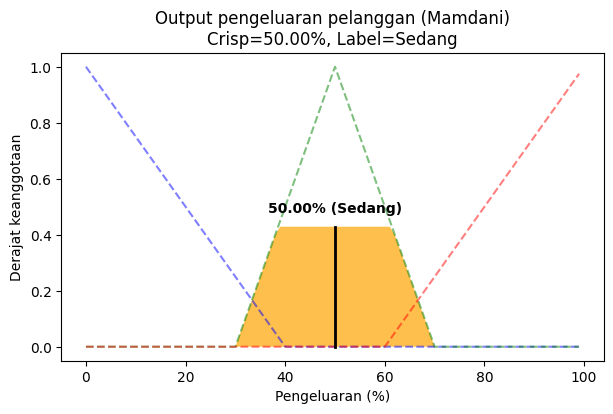

(np.float64(49.99999999999998), 'Sedang')

In [103]:
mamdami(20,15)

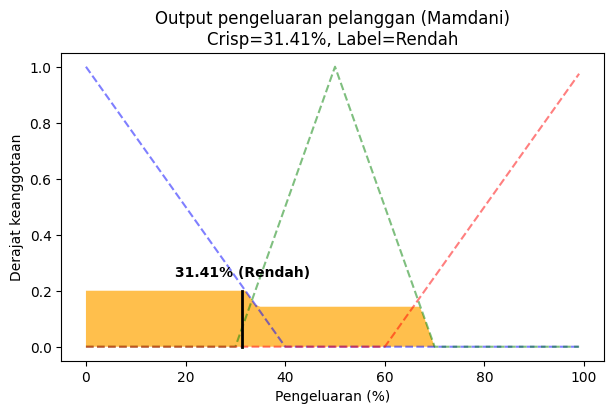

(np.float64(31.41226194113455), 'Rendah')

In [104]:
mamdami(50,40)

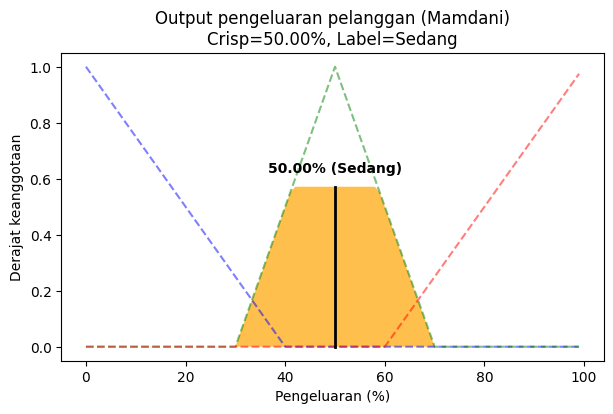

(np.float64(50.000000000000014), 'Sedang')

In [105]:
mamdami(35,70)

In [106]:


def Tsukamoto(age, income):
    age_level_muda = fuzz.interp_membership(x_age, age_muda, age)
    age_level_dewasa = fuzz.interp_membership(x_age, age_dewasa, age)
    age_level_tua = fuzz.interp_membership(x_age, age_tua, age)

    income_level_miskin = fuzz.interp_membership(x_income, income_miskin, income)
    income_level_menengah = fuzz.interp_membership(x_income, income_menengah, income)
    income_level_kaya = fuzz.interp_membership(x_income, income_kaya, income)

   
    alpha1 = np.fmin(age_level_muda, income_level_kaya)
    alpha2 = np.fmin(age_level_muda, income_level_menengah)
    alpha3 = np.fmin(age_level_muda, income_level_miskin)
    alpha4 = np.fmin(age_level_dewasa, income_level_kaya)
    alpha5 = np.fmin(age_level_dewasa, income_level_menengah)
    alpha6 = np.fmin(age_level_dewasa, income_level_miskin)
    alpha7 = np.fmin(age_level_tua, income_level_kaya)
    alpha8 = np.fmin(age_level_tua, income_level_menengah)
    alpha9 = np.fmin(age_level_tua, income_level_miskin)
    
    
    def inv_rendah(alpha): 
        return 50 - alpha * 50 if alpha > 0 else 0
    def inv_tinggi(alpha):  
        return 50 + alpha * 50 if alpha > 0 else 0

   
    z1, z2, z4 = inv_tinggi(alpha1), inv_tinggi(alpha2), inv_tinggi(alpha4)
    z3, z5, z6, z7, z8, z9 = (inv_rendah(a) for a in [alpha3, alpha5, alpha6, alpha7, alpha8, alpha9])

    
    alphas = [alpha1, alpha2, alpha4, alpha3, alpha5, alpha6, alpha7, alpha8, alpha9]
    zs     = [z1, z2, z4, z3, z5, z6, z7, z8, z9]

    num = sum(a*z for a, z in zip(alphas, zs))
    den = sum(alphas)
    kepuasan = num/den if den != 0 else 0

    # === LABEL DOMINAN ===
    rendah_val = fuzz.interp_membership(x_spending, spending_rendah, kepuasan)
    tinggi_val = fuzz.interp_membership(x_spending, spending_tinggi, kepuasan)
    label = "Rendah" if rendah_val > tinggi_val else "Tinggi"

    print(f"Hasil Crisp Kepuasan (Tsukamoto 2-label) = {kepuasan:.2f}")
    print(f"Label Dominan = {label}\n")

    # === VISUALISASI ===
    plt.figure(figsize=(7,4))
    plt.plot(x_spending, spending_rendah, 'b--', label='Rendah')
    plt.plot(x_spending, spending_tinggi, 'r--', label='Tinggi')
    plt.axvline(kepuasan, color='k', linewidth=2, label=f'Output = {kepuasan:.2f} ({label})')
    plt.title("Tsukamoto 2-label")
    plt.xlabel("Kepuasan (%)")
    plt.ylabel("Derajat Keanggotaan")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    return kepuasan, label


Hasil Crisp Kepuasan (Tsukamoto 2-label) = 28.57
Label Dominan = Rendah



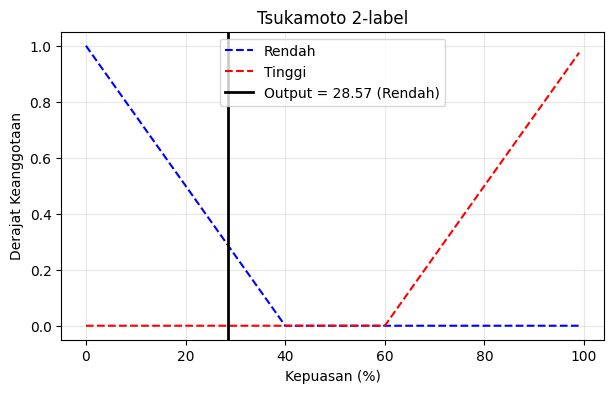

(np.float64(28.571428571428573), 'Rendah')

In [107]:
Tsukamoto(20,15)

Hasil Crisp Kepuasan (Tsukamoto 2-label) = 41.19
Label Dominan = Tinggi



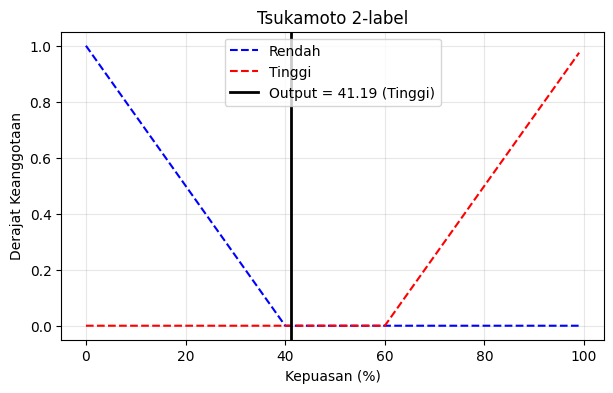

(np.float64(41.19047619047619), 'Tinggi')

In [108]:
Tsukamoto(50,40)

Hasil Crisp Kepuasan (Tsukamoto 2-label) = 21.43
Label Dominan = Rendah



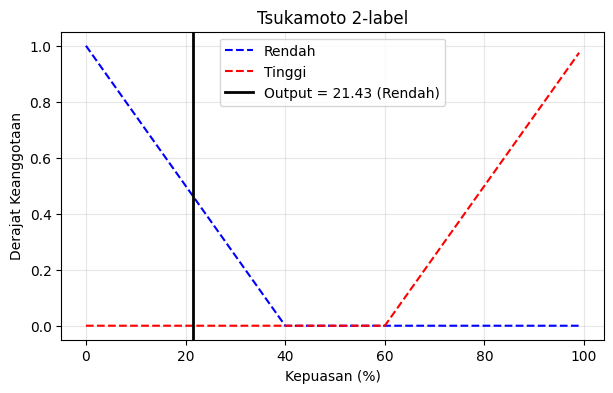

(np.float64(21.42857142857143), 'Rendah')

In [109]:
Tsukamoto(35,70)